1. Dataset Selection and Preliminary Research:

    a. Dataset Choice:
    For this project, I decided to select the "Superstore Sales Dataset" found on Kaggle. I chose this dataset because the data included was similar to the data I had to deal with at the company where I did an internship.
    
    b. Preliminary Research on the Dataset:
    This Dataset contains retail data of a global superstore for 4 years. It includes details such as OrderID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, and more. 
    The aim of this dataset is to capture and analyze sales activities within the superstore. Key objectives of analyzing it would be to understand customer behavior, identify popular products, and optimize shipping processes.
    This dataset has many potential questions to explore:
    - How have sales evolved over time? What are the top selling products? 
    - WHo are the most frequent customers and what is their purchasing behavior?
    - Which segment contributes most to sales? 
    - Which shipping modes are most commonly used? Is there a correlation between shipping mode and customer satisfaction? 

In [13]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
superstore = pd.read_csv('superstore.csv')

In [4]:
#Data Shape
superstore.shape

(9800, 18)

In [5]:
#Data Info
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
#First 5 Rows
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


2. Data Cleaning and Preprocessing:

    a. Dataset Cleaning:

In [8]:
print("Missing Values Before Handling:")
print(superstore.isnull().sum())

Missing Values Before Handling:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [9]:
#Rows with null in 'postal Code' column
superstore[superstore['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


All the null values for 'Postal Code' are from the same area, so we will replace them with the actual postal code of that area.

In [10]:
superstore['Postal Code'] = superstore['Postal Code'].fillna(5401)
superstore.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

Now we have no more missing values. 
Let's convert the invalid datatypes, 'Order Date' and 'Ship Date' should be converted to a date datatype.

In [12]:
#Conversion to datetime
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'],format='%d/%m/%Y')
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'],format='%d/%m/%Y')

# sort based on column 
superstore.sort_values(by=['Order Date'],inplace=True)

Now we can take care of outlier values using the z-score on the 'Sales' column as it is a numerical value.

In [14]:
#Outlier Removal
superstore['Sales_zscore'] = zscore(superstore['Sales'])
superstore = superstore[abs(superstore['Sales_zscore']) < 3]
superstore.drop(columns=['Sales_zscore'], inplace=True)

    b. Data Transformation:

In [17]:
# Dropping Duplicate Values
superstore.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720
906,907,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
645,646,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
908,909,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776


In [68]:
# Creating new columns from the 'Order Date' column:day , month and year
superstore['day'] = superstore['Order Date'].dt.day
superstore['month'] = superstore['Order Date'].dt.month
superstore['year'] = superstore['Order Date'].dt.year

In [70]:
superstore.sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,day,month,year
2660,2661,CA-2018-123372,2018-11-28,2018-12-02,Standard Class,DG-13300,Deirdre Greer,Corporate,United States,New York City,...,10035.0,East,TEC-PH-10002834,Technology,Phones,Google Nexus 5,1979.890,28,11,2018
1217,1218,US-2018-118087,2018-09-09,2018-09-13,Standard Class,SP-20620,Stefania Perrino,Corporate,United States,Philadelphia,...,19134.0,East,FUR-FU-10001867,Furniture,Furnishings,Eldon Expressions Punched Metal & Wood Desk Ac...,17.024,9,9,2018
965,966,CA-2018-135279,2018-04-09,2018-04-11,First Class,BS-11800,Bryan Spruell,Home Office,United States,New York City,...,10011.0,East,OFF-AR-10004344,Office Supplies,Art,Bulldog Vacuum Base Pencil Sharpener,35.970,9,4,2018


3. Exploratory Data Analysis:

<Axes: ylabel='count'>

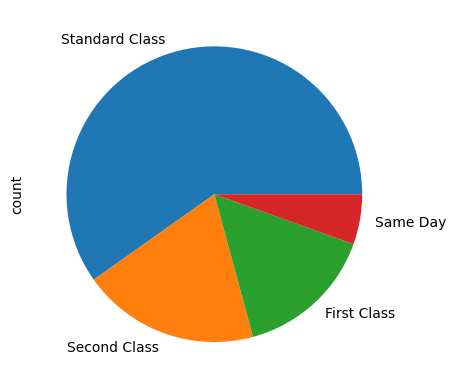

In [18]:
# Ship Mode Counts: 
superstore['Ship Mode'].value_counts()
# Ship Mode Distribution Visualization
superstore['Ship Mode'].value_counts().plot.pie()

<Axes: ylabel='count'>

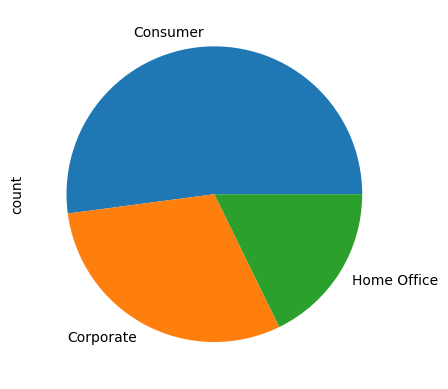

In [19]:
# Segment Column Counts
superstore['Segment'].value_counts()
# Segment Distribuation Visualization
superstore['Segment'].value_counts().plot.pie()

<Axes: ylabel='count'>

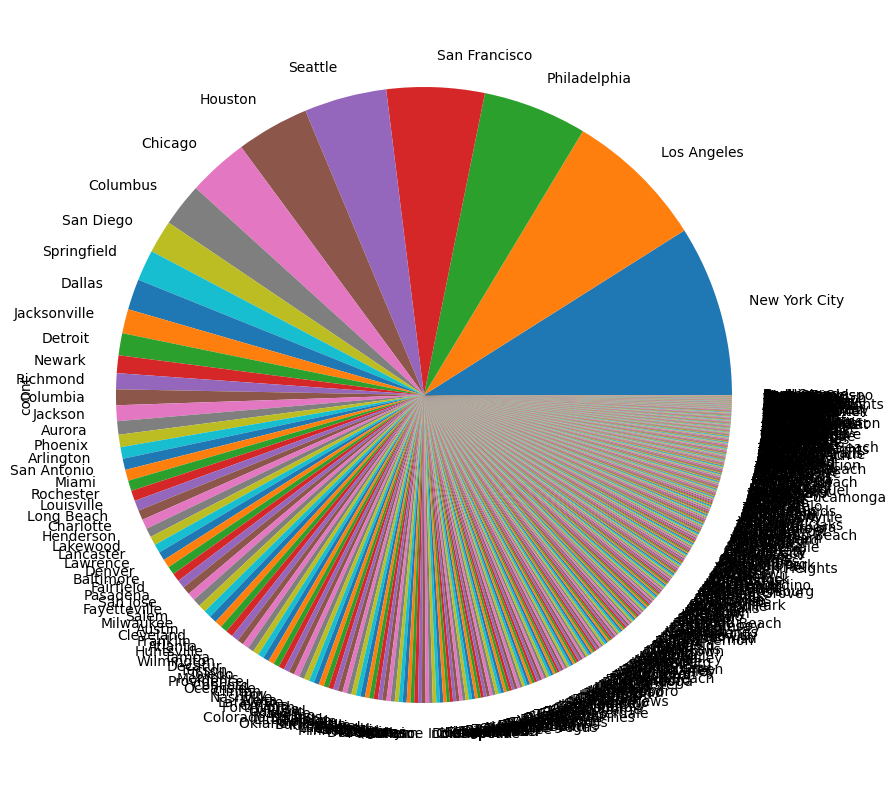

In [20]:
# City Value Counts
superstore['City'].value_counts()
#City DIstribution Visualization
plt.figure(figsize=(15,10))
superstore['City'].value_counts().plot.pie()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Texas'),
  Text(1, 0, 'Illinois'),
  Text(2, 0, 'Pennsylvania'),
  Text(3, 0, 'Kentucky'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Georgia'),
  Text(6, 0, 'Virginia'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'Louisiana'),
  Text(9, 0, 'Ohio'),
  Text(10, 0, 'South Carolina'),
  Text(11, 0, 'Oregon'),
  Text(12, 0, 'Arizona'),
  Text(13, 0, 'Arkansas'),
  Text(14, 0, 'Michigan'),
  Text(15, 0, 'Tennessee'),
  Text(16, 0, 'Nevada'),
  Text(17, 0, 'South Dakota'),
  Text(18, 0, 'New York'),
  Text(19, 0, 'Wisconsin'),
  Text(20, 0, 'Florida'),
  Text(21, 0, 'Washington'),
  Text(22, 0, 'New Jersey'),
  Text(23, 0, 'Missouri'),
  Text(24, 0, 'Indiana'),
  Text(25, 0, 'North Carolina'),
  Text(26, 0, 'Colorado'),
  Text(27, 0, 'Utah'),
  Text(28, 0, 'Mississ

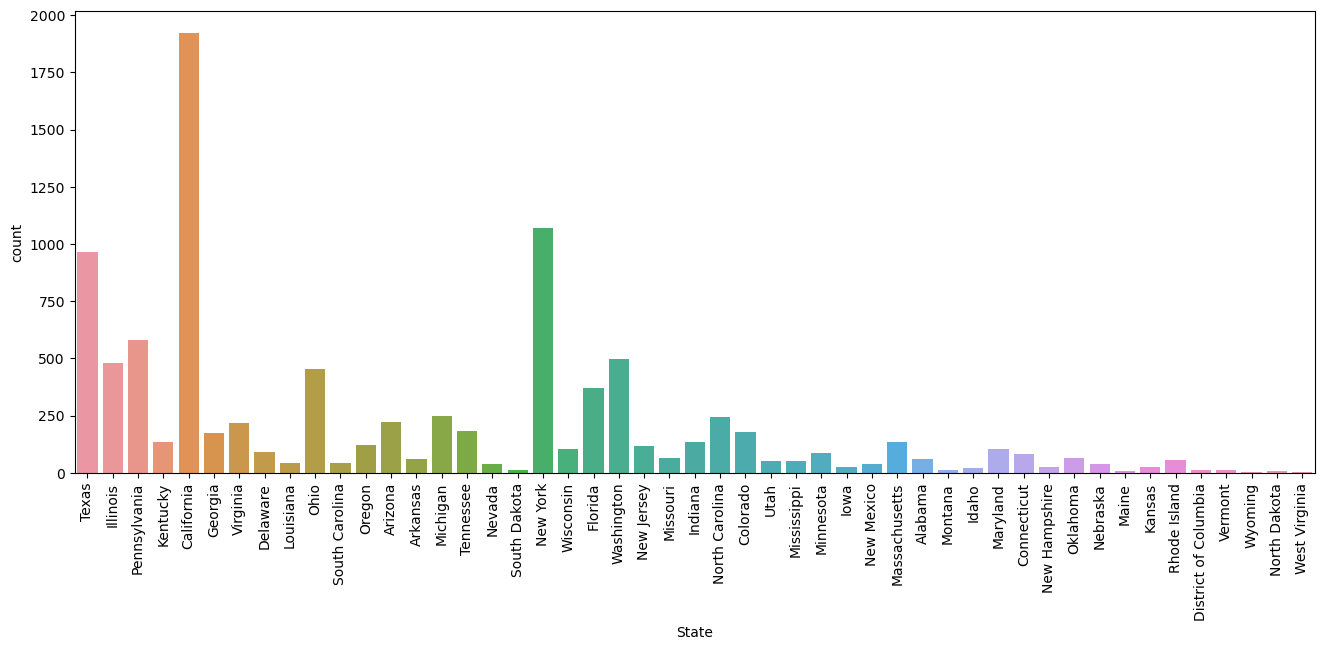

In [28]:
# Visualize category columns
plt.figure(figsize=(16,6))
sns.countplot(x ='State' , data=superstore)
plt.xticks(rotation='vertical')

In [36]:
#Top 10 States and their Sales
top_stats = superstore.groupby(['State']).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False).head(10)
top_stats = top_stats[['Sales']].round(2)
top_stats.reset_index(inplace=True)
top_stats

,State,Sales
0,California,365159.08
1,New York,203843.91
2,Texas,141475.33
3,Washington,102182.71
4,Pennsylvania,95713.33
5,Illinois,73700.60
6,Ohio,70630.37
7,Florida,58626.24
8,Michigan,50421.52
9,Virginia,46986.88


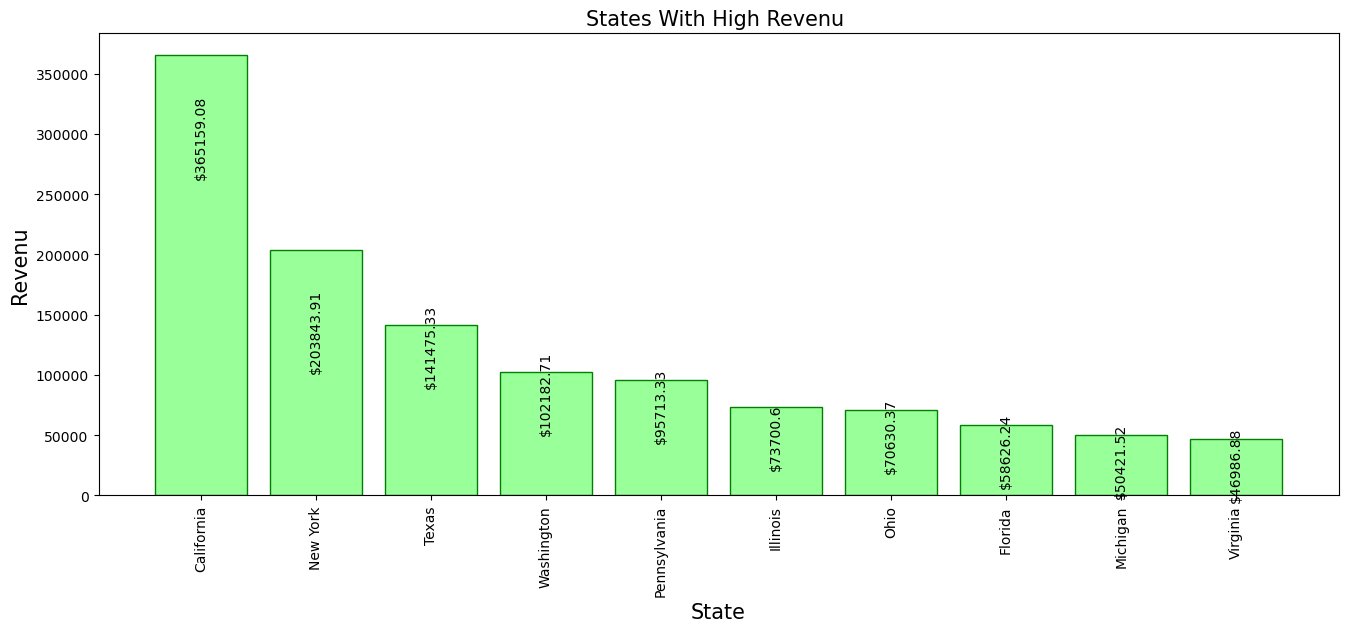

In [37]:
#Top 10 States Visualization
plt.figure(figsize=(16,6))
plt.bar(top_stats['State'],top_stats['Sales'] ,color="#99ff99" , edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('States With High Revenu ',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenu',fontsize=15)

for k , v in top_stats['Sales'].items(): 
    if v > 200000 : 
        plt.text(k,v-100000,"$"+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-50000,"$"+str(v),rotation=90,horizontalalignment='center')

In [39]:
# Top 10 Cities
top_city = superstore.groupby(['City']).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False).head(10)
top_city = top_city[['Sales']].round(2)
top_city.reset_index(inplace=True)
top_city

,City,Sales
0,New York City,165554.67
1,Los Angeles,137310.85
2,San Francisco,91140.90
3,Philadelphia,88278.43
4,Seattle,85747.80
5,Houston,53579.98
6,Chicago,42284.22
7,San Diego,37020.19
8,Columbus,35722.63
9,Springfield,26988.40


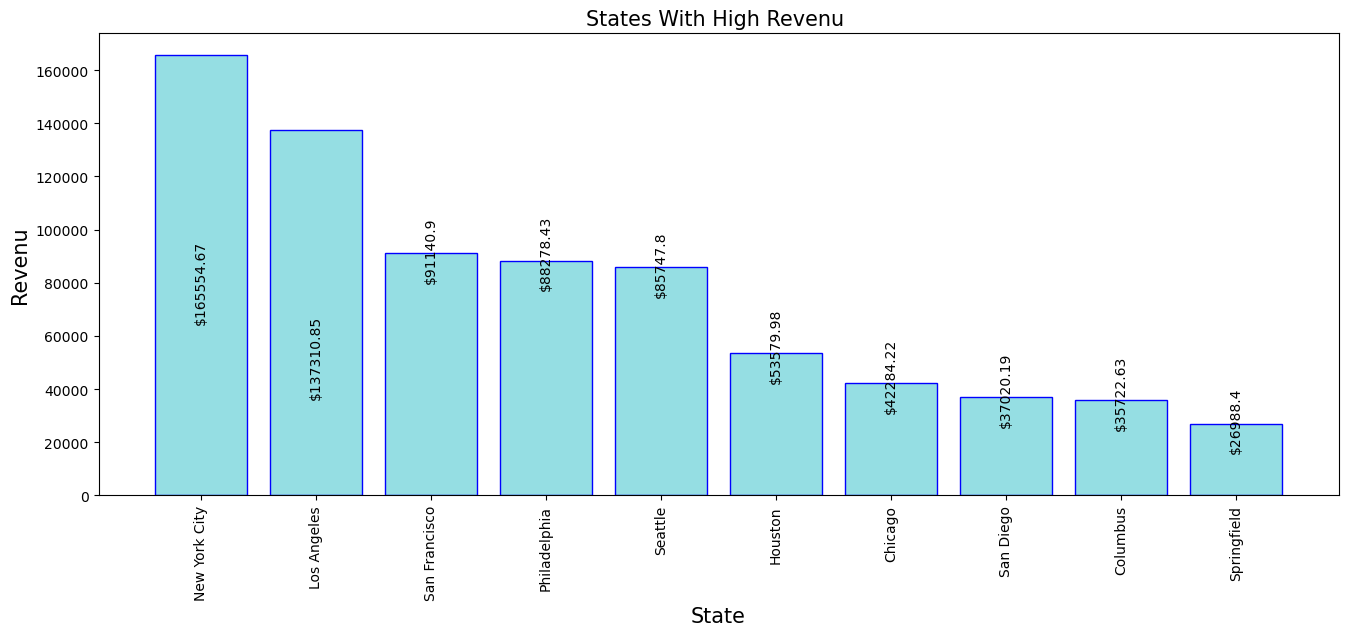

In [40]:
# Top 10 Cities Visualization
plt.figure(figsize=(16,6))
plt.bar(top_city['City'],top_city['Sales'] ,color="#95dee3" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('States With High Revenu ',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenu',fontsize=15)

for k , v in top_city['Sales'].items(): 
    if v > 100000 : 
        plt.text(k,v-100000,"$"+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-10000,"$"+str(v),rotation=90,horizontalalignment='center')

In [41]:
# Top 10 customers
top_customers = superstore.groupby(['Customer Name']).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False).head(10)
top_customers = top_customers[['Sales']].round(2)
top_customers.reset_index(inplace=True)
top_customers

,Customer Name,Sales
0,Clay Ludtke,8331.99
1,Natalie Fritzler,8080.47
2,Zuschuss Carroll,8025.71
3,Jonathan Doherty,7610.86
4,Brian Moss,7294.18
5,John Lee,6951.36
6,Brenda Bowman,6765.73
7,Dan Reichenbach,6528.03
8,Valerie Dominguez,6442.25
9,James Galang,6366.39


Text(0, 0.5, 'Revenu')

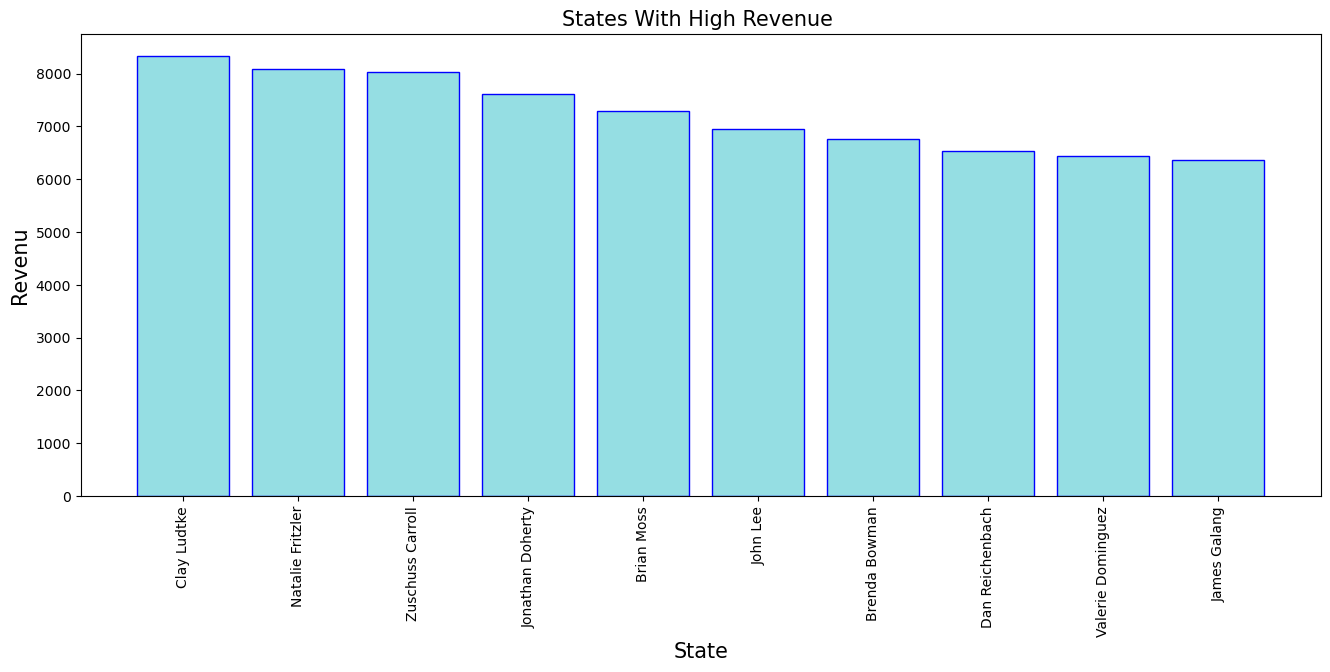

In [58]:
# Top 10 Customers Visualization
plt.figure(figsize=(16,6))
plt.bar(top_customers['Customer Name'],top_customers['Sales'] ,color="#95dee3" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('States With High Revenue ',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenu',fontsize=15)


In [59]:
# Categories
superstore['Category'].value_counts()

Category
Office Supplies    5880
Furniture          2046
Technology         1751
Name: count, dtype: int64

In [62]:
# Sales by categories
category_sales = superstore.groupby(['Category']).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
category_sales.reset_index(inplace=True)
category_sales

,Category,Sales
0,Furniture,634097.3411
1,Office Supplies,585243.9120
2,Technology,537266.1200


([<matplotlib.patches.Wedge at 0x7fdefa55e820>,
 [Text(0.4652957118139245, 0.9967446516373055, 'Furniture'),
  Text(-1.0835465116972383, -0.1895440766385138, 'Office Supplies'),
  Text(0.6300878091660279, -0.9016592220680468, 'Technology')],
 [Text(0.2537976609894133, 0.5436789008930757, '36.10%  ($634097)'),
  Text(-0.5910253700166753, -0.10338767816646206, '33.32%  ($585244)'),
  Text(0.34368425954510606, -0.49181412112802547, '30.59%  ($537266)')])

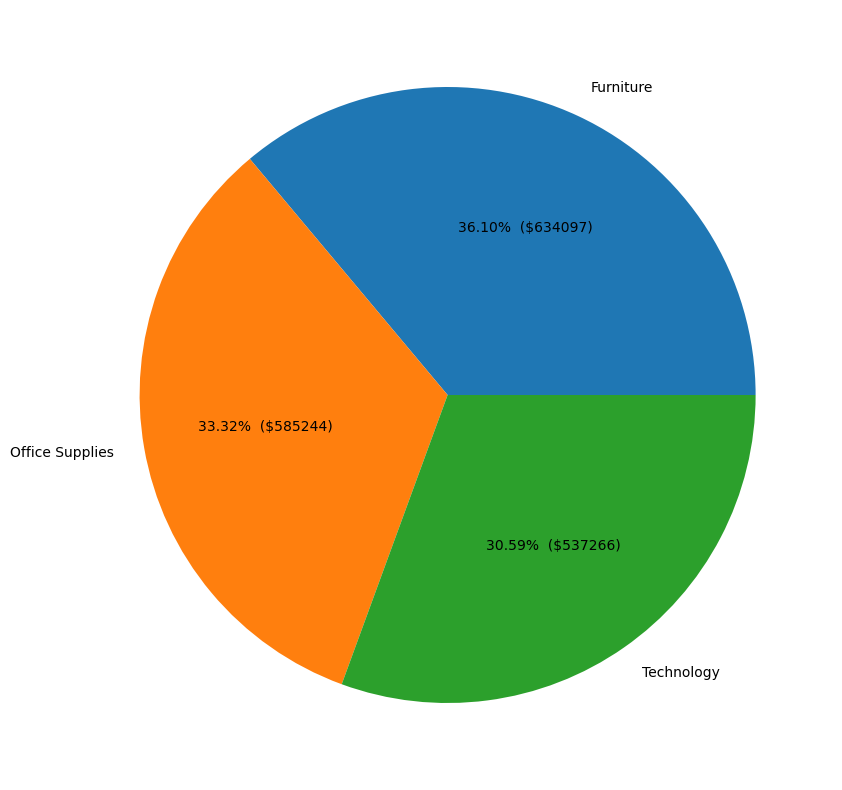

In [63]:
# Category Sales Visualization
plt.figure(figsize=(15,10))
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  (${v:d})'.format(p=pct,v=val)
    return my_autopct


plt.pie(category_sales['Sales'],labels=category_sales['Category'],autopct=make_autopct(category_sales['Sales']))

In [65]:
# Top Products
top_products = superstore.groupby(['Product Name']).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False).head(5)
top_products.reset_index(inplace=True)
top_products

,Product Name,Sales
0,SAFCO Arco Folding Chair,11572.780
1,GBC DocuBind TL300 Electric Binding System,10674.181
2,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",10637.528
3,Tennsco 6- and 18-Compartment Lockers,10076.460
4,Tennsco Double-Tier Lockers,9630.856


([<matplotlib.patches.Wedge at 0x7fdf0bc19d60>,
 [Text(0.8474563717938758, 0.7012971537843002, 'SAFCO Arco Folding Chair'),
  Text(-0.4779068596011645, 0.9907598263687083, 'GBC DocuBind TL300 Electric Binding System'),
  Text(-1.087366049236338, -0.1662380069904533, 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back'),
  Text(-0.19880575975879491, -1.081885516072162, 'Tennsco 6- and 18-Compartment Lockers'),
  Text(0.9229302316738246, -0.5984979427387371, 'Tennsco Double-Tier Lockers')],
 [Text(0.4622489300693867, 0.3825257202459819, '22.00%  ($11573)'),
  Text(-0.26067646887336243, 0.5404144507465681, '20.30%  ($10674)'),
  Text(-0.5931087541289116, -0.09067527654024723, '20.23%  ($10638)'),
  Text(-0.10843950532297904, -0.5901193724029974, '19.16%  ($10076)'),
  Text(0.5034164900039042, -0.32645342331203836, '18.31%  ($9631)')])

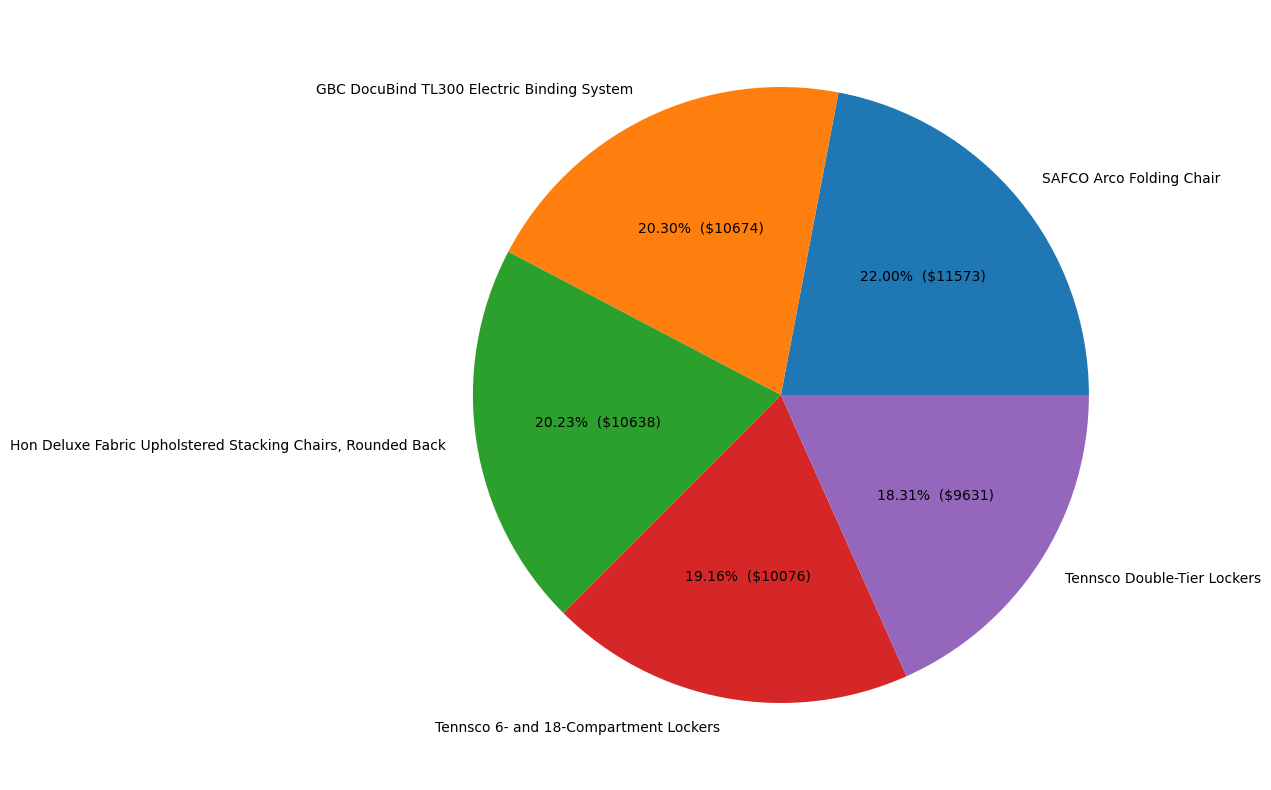

In [66]:
# Product Sales Visualization
plt.figure(figsize=(15,10))
plt.pie(top_products['Sales'],labels=top_products['Product Name'],autopct=make_autopct(top_products['Sales']))

<Axes: ylabel='count'>

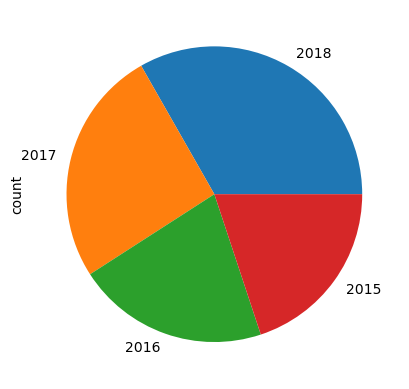

In [71]:
# Orders over the Years
superstore['year'].value_counts().plot.pie()

In [73]:
# Sales for each Year
year_sales = superstore.groupby(['year']).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
year_sales.reset_index(inplace=True)
year_sales

,year,Sales
0,2018,562205.7692
1,2017,456417.0874
2,2016,378135.8434
3,2015,359848.6731


<BarContainer object of 4 artists>

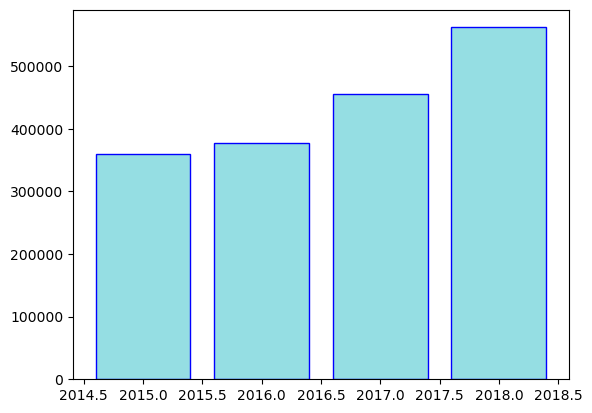

In [74]:
# Sales per Year Visualization
plt.bar(year_sales['year'],year_sales['Sales'] ,color="#95dee3" , edgecolor='blue')

In [78]:
# Sales per Month for each Year
all_sales = []

years = [2015,2016,2017,2018]
for year in years : 
    x = superstore['year'] == year
    df2 = superstore[x]
    sales = df2.groupby(['month']).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
    sales.reset_index(inplace=True)
    all_sales.append([year,sales['Sales']])
    
all_sales

[[2015,
  0     60271.9247
  1     52503.9305
  2     46874.6278
  3     31056.5596
  4     29067.3870
  5     28717.4410
  6     27117.5365
  7     23742.8050
  8     23416.3090
  9     20928.3730
  10    11631.8870
  11     4519.8920
  Name: Sales, dtype: float64],
 [2016,
  0     62168.5292
  1     58632.3575
  2     55821.4720
  3     30938.3822
  4     30341.4985
  5     28558.3075
  6     26298.6090
  7     22834.4384
  8     21618.4265
  9     20548.9980
  10    10965.3936
  11     9409.4310
  Name: Sales, dtype: float64],
 [2017,
  0     80707.3810
  1     63160.9468
  2     59094.5873
  3     36080.1820
  4     33090.7430
  5     32223.7580
  6     32147.1970
  7     29905.9550
  8     29579.8370
  9     27655.1443
  10    18542.4910
  11    14228.8650
  Name: Sales, dtype: float64],
 [2018,
  0     89613.2310
  1     77670.4768
  2     73989.1270
  3     49095.6272
  4     44436.4080
  5     42546.2917
  6     40029.9440
  7     39463.5428
  8     37662.1102
  9     24868.602

In [85]:
# Yearly Sales per Month Aggregated
my_sales = superstore.groupby(['year', 'month']).agg({'Sales': 'sum'}).reset_index()
my_sales.reset_index(inplace=True)
my_sales.head()

,index,year,month,Sales
0,0,2015,1,11631.887
1,1,2015,2,4519.892
2,2,2015,3,29067.387
3,3,2015,4,23742.805
4,4,2015,5,20928.373


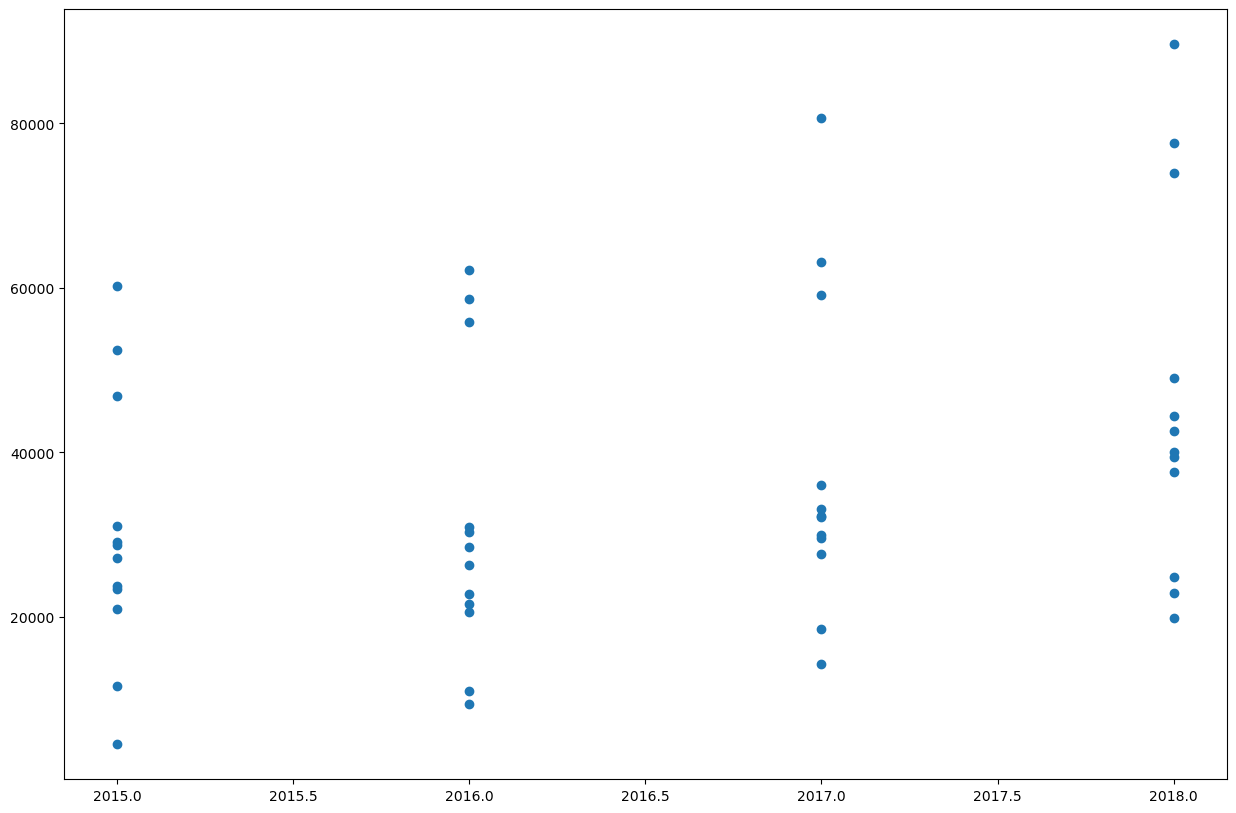

In [86]:
# Aggregated Results Visualization
plt.figure(figsize=(15,10))
plt.scatter(my_sales['year'],my_sales['Sales'])

In [88]:
#Each Year Sales Separated

# 2015
x = superstore['year'] == 2015
df2 = superstore[x]
sales = df2.groupby(['month']).agg({'Sales': 'sum'}).reset_index()
sales.reset_index(inplace=True)
sales_2015 = [round(x,2) for x in list(sales['Sales'])]

#2016
x = superstore['year'] == 2016
df2 = superstore[x]
sales = df2.groupby(['month']).agg({'Sales': 'sum'}).reset_index()
sales.reset_index(inplace=True)
sales_2016 = [round(x,2) for x in list(sales['Sales'])]

#2017
x = superstore['year'] == 2017
df2 = superstore[x]
sales = df2.groupby(['month']).agg({'Sales': 'sum'}).reset_index()
sales.reset_index(inplace=True)
sales_2017 = [round(x,2) for x in list(sales['Sales'])]

#2018
x = superstore['year'] == 2018
df2 = superstore[x]
sales = df2.groupby(['month']).agg({'Sales': 'sum'}).reset_index()
sales.reset_index(inplace=True)
sales_2018 = [round(x,2) for x in list(sales['Sales'])]

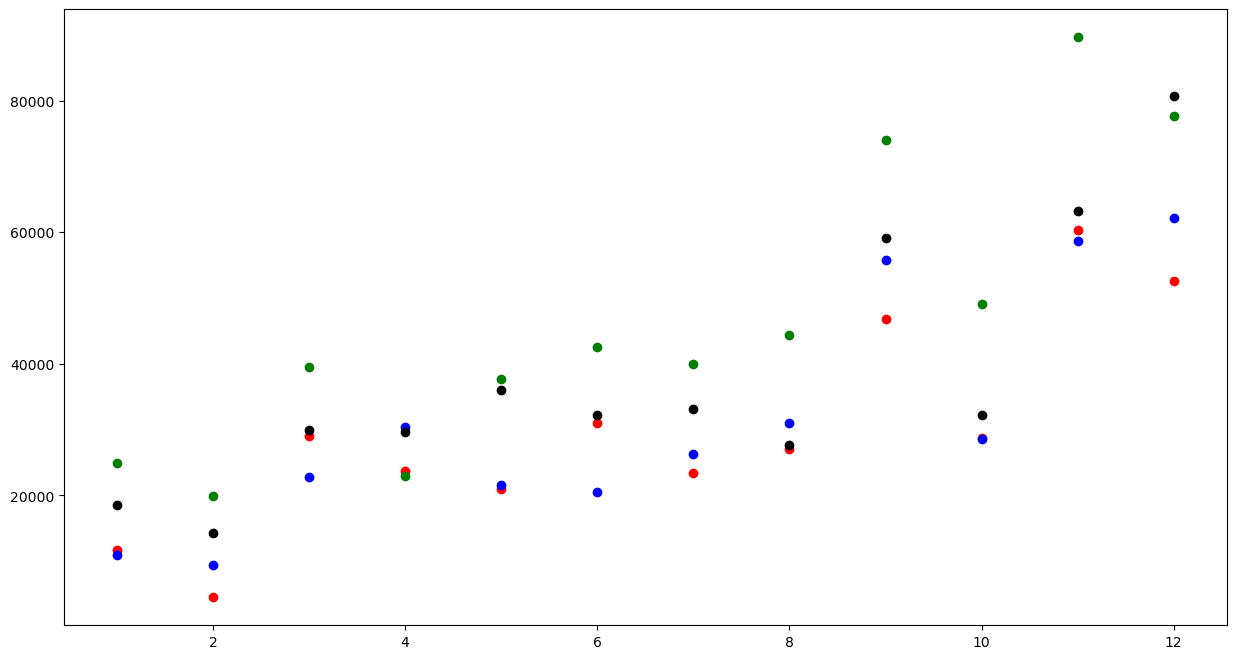

In [89]:
# ScatterPlot Visalization
plt.figure(figsize=(15,8))

#day one, the age and speed of 13 cars:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = np.array(sales_2015)
plt.scatter(x, y , color = 'red')

#day two, the age and speed of 15 cars:
y = np.array(sales_2016)
plt.scatter(x, y , color = 'blue')



y = np.array(sales_2017)
plt.scatter(x, y , color = 'black')


y = np.array(sales_2018)
plt.scatter(x, y , color = 'green')

plt.show()

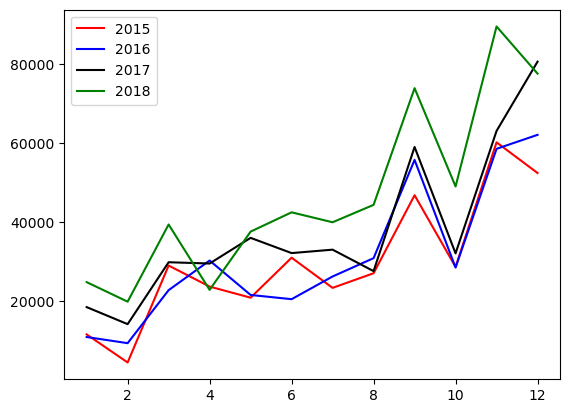

In [90]:
# Line Graph Visualization 
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = np.array(sales_2015)
plt.plot(x, y , color = 'red' ,label='2015')

y = np.array(sales_2016)
plt.plot(x, y , color = 'blue' ,label='2016')

y = np.array(sales_2017)
plt.plot(x, y , color = 'black',label='2017')

y = np.array(sales_2018)
plt.plot(x, y , color = 'green' , label='2018')

plt.legend()
plt.show()

4. Statistical Inference:

    a. Hypotheseses based on EDA findings:
    - Hypothesis 1: 
        * Null Hypothesis (H0): There is no significant difference in average sales between different product categories.
        * Alternative Hypothesis (H1): There is a significant difference in average sales between at least two product categgories.
    - Hypothesis 2:
        * Null Hypothesis (H0):The average sales in 2018 are equal to average sales in 2017
        * Alternative Hypothesis (H1): The average sales in 2018 are not equal to average sales in 2017. 
    
    b. Statistical Analysis:

In [99]:
#Hypothesis 1 Analysis

from scipy.stats import f_oneway

# Extract sales for each product category
furniture_sales = superstore[superstore['Category'] == 'Furniture']['Sales']
office_supplies_sales = superstore[superstore['Category'] == 'Office Supplies']['Sales']
technology_sales = superstore[superstore['Category'] == 'Technology']['Sales']

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(furniture_sales, office_supplies_sales, technology_sales)

# Display the results
print(f"ANOVA F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in average sales between product categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average sales between product categories.")

ANOVA F-Statistic: 605.752516563527
P-value: 1.3804733750274828e-248
Reject the null hypothesis. There is a significant difference in average sales between product categories.


In [98]:
#Hypothesis 2 Analysis

from scipy.stats import ttest_ind

# Extract sales for each year
sales_2017 = superstore[superstore['year'] == 2017]['Sales']
sales_2018 = superstore[superstore['year'] == 2018]['Sales']

# Perform independent t-test
t_statistic, p_value = ttest_ind(sales_2017, sales_2018)

# Display the results
print(f"t-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in average sales between 2017 and 2018.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average sales between 2017 and 2018.")

t-Statistic: 0.9374671405674314
P-value: 0.34855791232074584
Fail to reject the null hypothesis. There is no significant difference in average sales between 2017 and 2018.


c. Result Interpretation and Conclusions:

- For Hypothesis 1, The extremely low p-value (close to zero) indicates that there is strong evidence to reject the null hypothesis. Therefore, we conclude that there is a significant difference in average sales between at least two product categories (Furniture, Office Supplies, Technology). Businesses should consider tailoring their strategies based on the type of product they are selling to optimize sales performance.
    
- The p-value (0.35) is greater than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis. There is no significant difference in average sales between the years 2017 and 2018 based on the given dataset. The evidence suggests that any observed differences in sales between these two years could be due to random variation.

5. Visualization and Presentation of Findings:

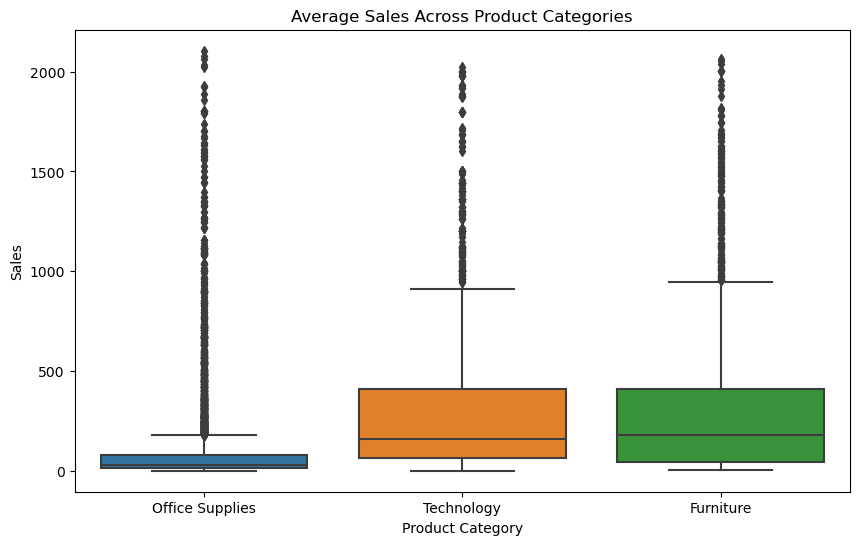

In [102]:
# Hypothesis 1 Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=superstore)
plt.title('Average Sales Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()

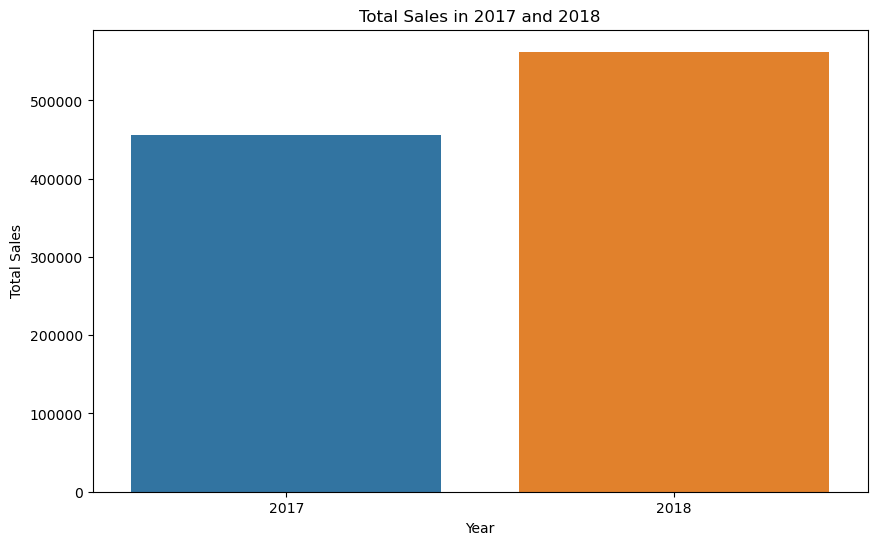

In [103]:
# Hypothesis 2 Visualization
sales_2017_2018 = superstore[superstore['year'].isin([2017, 2018])]

# Visualize total sales for the years 2017 and 2018
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='Sales', data=sales_2017_2018.groupby('year')['Sales'].sum().reset_index())
plt.title('Total Sales in 2017 and 2018')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()